In [ ]:
!pip install -U numpy matplotlib sunpy

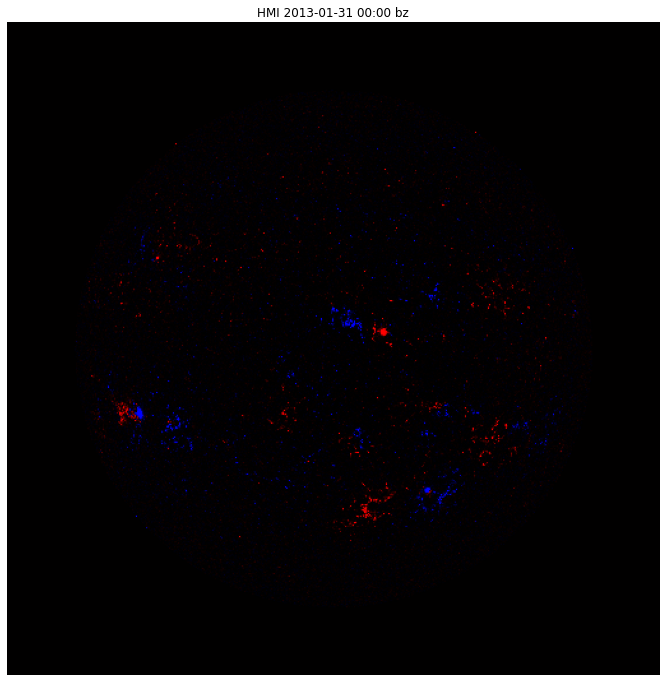

In [4]:
# https://github.com/dfouhey/sdodemo/blob/master/vis_demo.py
import numpy as np
import matplotlib.pyplot as plt
import sunpy
from sunpy.visualization.colormaps import cm
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

#Channels that correspond to HMI Magnetograms 
HMI_WL = ['bx','by','bz']
#A colormap for visualizing HMI
HMI_CM = LinearSegmentedColormap.from_list("bwrblack", ["#0000ff","#000000","#ff0000"])

def channelNameToMap(name):
    """Given channel name, return colormap"""
    return HMI_CM if name in HMI_WL else cm.cmlist.get('sdoaia%d' % int(name))

def getClip(X,name):
    """Given an image and the channel name, get the right clip"""
    return getSignedPctClip(X) if name in HMI_WL else getPctClip(X)

def getPctClip(X):
    """Return the 99.99th percentile"""
    return (0,np.quantile(X.ravel(),0.999))

def getSignedPctClip(X):
    """Return the 99.99th percentile by magnitude, but symmetrize it so 0 is in the middle"""
    v = np.quantile(np.abs(X.ravel()),0.999)
    return (-v,v)

def vis(X, cm, clip):
    """Given image, colormap, and a clipping, visualize results"""
    Xc = np.clip((X-clip[0])/(clip[1]-clip[0]),0,1)
    Xcv = cm(Xc)
    return (Xcv[:,:,:3]*255).astype(np.uint8)

channelName = "bz"

X = np.load("./HMI20130131_0000_bz.npz")['x'].astype(np.float64)
V = vis(X, channelNameToMap(channelName), getClip(X, channelName))

img = Image.fromarray(V)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
plt.title("HMI 2013-01-31 00:00 bz")
plt.imshow(img)